# Datavidia 2019
## By: Tim BEBAS - University of Indonesia
### 1. Muhammad Ridho Ananda(Captain) - mridho2828@gmail.com
### 2. Jonathan Edwin - edwin.jon28@gmail.com
### 3. Lulu Ilmaknun Qurotaini - lulu.ilmaknun.q@gmail.com

# CRISP - DM

Dalam melakukan pengerjaan lomba ini, kami menggunakan proses bernama `Cross-Industry Standard Process Model for Data Mining` atau yang sering disingkat sebagai `CRISP-DM`. `CRISP-DM` adalah suatu metodologi yang sudah digunakan secara umum untuk melakukan penambangan data. Metodologi tersebut terbagi menjadi enam tahap, yaitu:
    
    - Business Understanding
    - Data Understanding
    - Data Preparation
    - Modeling
    - Evaluation
    - Deployment

![Diagram CRISP-DM](https://drive.google.com/uc?id=1QQz-M2iYNlwFnION6hI5IT-i_haqnlro)

Image 1. Diagram CRISP-DM [1]







# 1. Understand the Problem (Business and Data)

## A. Understand the Business

In this section, we strive to understand all initial information from a business perspective. There are some things we know are, the data comes from one of the largest ticketing companies in Indonesia. In this competition, we were asked to make a model that can predict whether a customer will make a hotel booking together with buying plane tickets or what is referred to as cross selling.

Cross Selling is a sales practice by involving promotion of additional products so that consumers buy the initial product and the additional product. For this case, the initial product is a plane ticket and the additional product is a hotel booking. So from here we can make the `problem statement` as follows:

`Problem Statement`: Prediction 'whether in a flight ticket purchase transaction a hotel booking (cross sell) occurs'

By doing this prediction, the company can find out customers who might cross sell so that they can provide the appropriate hotel booking ad so that the person crosses and the company can increase revenue.

## B. Understand the Data

The Understand the Data phase starts with us trying to find out what data we have and what the quality is like. Data on the reality in the field most often has poor quality, it could be due to many missing values, or even invalid so that we cannot trust the data. So in this phase, it is an important phase to find out the data used

The following data will be used:

- flight.csv - Training data containing various flight transactions and their attributes
- test.csv - Test data that contains flight transactions that must be predicted whether cross sell or not
- hotel.csv - Contains hotel data and attributes
- Data Dictionary.pdf - Contains the meanings of variables from each data
- sample_submission.csv - Contains submission format to Kaggle

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_predict
from sklearn.utils import class_weight
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

### Import Files

In [2]:
import os
listA =[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        listA.append(os.path.join(dirname, filename))

print(listA)

flight = pd.read_csv("/kaggle/input/datavidia2019/flight.csv")
hotel = pd.read_csv("/kaggle/input/datavidia2019/hotel.csv")
test = pd.read_csv("/kaggle/input/datavidia2019/test.csv")
ss = pd.read_csv("/kaggle/input/datavidia2019/sample_submission.csv")

['/kaggle/input/datavidia2019/hotel.csv', '/kaggle/input/datavidia2019/sample_submission.csv', '/kaggle/input/datavidia2019/flight.csv', '/kaggle/input/datavidia2019/test.csv', '/kaggle/input/datavidia2019/Data Dictionary.pdf']


### Info for every Dataset

In [3]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117946 entries, 0 to 117945
Data columns (total 14 columns):
account_id              117946 non-null object
order_id                117946 non-null object
member_duration_days    117946 non-null float64
gender                  117946 non-null object
trip                    117946 non-null object
service_class           117946 non-null object
price                   117946 non-null float64
is_tx_promo             117946 non-null object
no_of_seats             117946 non-null float64
airlines_name           117946 non-null object
route                   117946 non-null object
hotel_id                117946 non-null object
visited_city            117946 non-null object
log_transaction         117946 non-null object
dtypes: float64(3), object(11)
memory usage: 12.6+ MB


In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2962 entries, 0 to 2961
Data columns (total 6 columns):
hotel_id          2962 non-null object
starRating        2962 non-null float64
city              2962 non-null object
free_wifi         2962 non-null object
pool_access       2962 non-null object
free_breakfast    2962 non-null object
dtypes: float64(1), object(5)
memory usage: 139.0+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
account_id              10000 non-null object
order_id                10000 non-null object
member_duration_days    10000 non-null int64
gender                  10000 non-null object
trip                    10000 non-null object
service_class           10000 non-null object
price                   10000 non-null float64
is_tx_promo             10000 non-null object
no_of_seats             10000 non-null int64
airlines_name           10000 non-null object
route                   10000 non-null object
visited_city            10000 non-null object
log_transaction         10000 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 1015.8+ KB


In [6]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
order_id         10000 non-null object
is_cross_sell    10000 non-null object
dtypes: object(2)
memory usage: 156.4+ KB


### Check Top 5 of the Dataset

In [7]:
flight.head()

,account_id,order_id,member_duration_days,gender,trip,service_class,price,is_tx_promo,no_of_seats,airlines_name,route,hotel_id,visited_city,log_transaction
0,912aa410a02cd7e1bab414214a7005c0,5c6f39c690f23650d3cde28e5b51c908,566.0,M,trip,ECONOMY,885898.00,NO,1.0,33199710eb822fbcfd0dc793f4788d30,CGK - DPS,None,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[545203.03, 918492.11, 1774241.4, 885898.0]'"
1,d64a90a618202a5e8b25d8539377f3ca,5cbef2b87f51c18bf399d11bfe495a46,607.0,M,trip,ECONOMY,2139751.25,NO,2.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,None,"'['Jakarta', 'Medan', 'Bali']'","'[555476.36, 2422826.84, 7398697.64, 7930866.8..."
2,1a42ac02bcb4a902973123323f84da55,38fc35a1e62384012a358ab1fbd5ad03,648.0,F,trip,ECONOMY,2695550.00,NO,1.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,None,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'[7328957.45, 7027662.34, 1933360.88, 3461836...."
3,92cddd64d4be4dec6dfbcc0c50e902f4,c7f54cb748828b4413e02dea2758faf6,418.0,F,trip,ECONOMY,1146665.00,NO,1.0,0a102015e48c1f68e121acc99fca9a05,CGK - DPS,None,"'['Jogjakarta', 'Bali', 'Jakarta', 'Medan']'","'[5243631.69, 2474344.48, 1146665.0]'"
4,bf637abc47ea93bad22264f4956d67f6,dec228e4d2b6023c9f1fe9cfe9c451bf,537.0,F,trip,ECONOMY,1131032.50,NO,1.0,6c483c0812c96f8ec43bb0ff76eaf716,CGK - DPS,None,"'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'S...","'[9808972.98, 9628619.79, 6712680.0, 5034510.0..."


In [8]:
hotel.head()

,hotel_id,starRating,city,free_wifi,pool_access,free_breakfast
0,e2733e84102226acf6b53bffd2e60cf8,0.0,bali,YES,NO,NO
1,9f9de5df06d64ada1026e930687a87e4,0.0,bali,YES,NO,NO
2,3cf6774fb4dc331bb49e7a959b74a67e,0.0,bali,YES,NO,NO
3,eca261898220478834072b0c753a5229,0.0,bali,YES,NO,NO
4,c21f400013fa4f244a7168a3c155b8b5,0.0,bali,YES,NO,NO


In [9]:
test.head()

,account_id,order_id,member_duration_days,gender,trip,service_class,price,is_tx_promo,no_of_seats,airlines_name,route,visited_city,log_transaction
0,89a5fadd4d596610ff56044b9a0b1f4f,5ca64fd80a069208e3c0aa05dd580fb8,1754,M,trip,ECONOMY,3143400.00,YES,3,e35de6a36d385711a660c72c0286154a,CGK - DPS,"'['Bali', 'Jakarta', 'Medan']'","'[568508.04, 245284.05, 748834.2, 7930226.7, 6..."
1,86b28323bec6d938d47cee887e509b28,aca60904549a8a5958fe7a642efcb534,1084,F,trip,ECONOMY,2166607.04,NO,2,e35de6a36d385711a660c72c0286154a,CGK - DPS,"'['Medan', 'Bali', 'Jakarta']'","'[9916349.28, 7404847.79, 4697159.89, 2166607...."
2,36ef956ac3ef963c48e67327a4b6cc78,1771011e3adec5db9f30d15b3d439711,2378,M,round,ECONOMY,1239615.00,NO,1,ad5bef60d81ea077018f4d50b813153a,CGK - DPS,"'['Jakarta', 'Medan', 'Bali']'","'[249468.18, 1854801.11, 3311742.08, 4002723.4..."
3,f7821289404d44db50eb2edd4f82ea5b,6fc1b7d590c2a8c539ce56397403194d,576,F,trip,ECONOMY,1984060.00,YES,2,33199710eb822fbcfd0dc793f4788d30,CGK - DPS,"'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'S...","'[6137034.61, 58939.21, 1984060.0]'"
4,f62f33d1de5aabc919b69b1b5697f27a,c1f4712f60cd758e773555690d148764,862,F,trip,ECONOMY,2990624.00,YES,1,74c5549aa99d55280a896ea50068a211,CGK - DPS,"'['Bali', 'Jakarta', 'Medan']'","'[9653724.83, 6417438.6, 2990624.0]'"


In [10]:
ss.head()

,order_id,is_cross_sell
0,5ca64fd80a069208e3c0aa05dd580fb8,yes
1,aca60904549a8a5958fe7a642efcb534,yes
2,1771011e3adec5db9f30d15b3d439711,yes
3,6fc1b7d590c2a8c539ce56397403194d,yes
4,c1f4712f60cd758e773555690d148764,yes


### Memeriksa setiap Column dan hitung value counts

In [11]:
for column in flight.columns:
    print(flight[column].value_counts())

d64a90a618202a5e8b25d8539377f3ca    3311
fbb4123bb341ad85719af86930a0ccea     311
bf637abc47ea93bad22264f4956d67f6     161
74b423f5354172076e9529debf8866ac     145
4944140d10e202e845f0766a3e3ac2d1     133
                                    ... 
b2a3f138ed1fc1b1f3d2d09ea884875c       1
56e72b9da001a8df317397939a63eb84       1
1e71667eb45e46564984daf8333c8201       1
c37248efa88f89e7ebe2786c601d1a19       1
f938550df90d89d9813cf4425cdc282a       1
Name: account_id, Length: 74796, dtype: int64
a331fb5f9e191578a284b31c678c3ab3    1
9a337ea8a4b44b52744b4a7bf349d104    1
2f45c249819f55c78f4016aaeee5ffbf    1
bcc5791dda2dc74da58e01c38c9602c6    1
0ae9f5537e0c51bb934ca6eb96a8ad78    1
                                   ..
856ad429249c27f20817f5ad51046ecb    1
b46c0c12a36e5657a0c05486dce7a34a    1
39cc48cdcfeb833a679924d8baf4ee6a    1
7db1ff9b4dffad4bcc2e3fc8c83757e4    1
801d94a5e77947cf751ec4a7cd965d71    1
Name: order_id, Length: 117946, dtype: int64
607.0     3542
396.0      755
640.0     

In [12]:
for column in hotel.columns:
    print(hotel[column].value_counts())

587d516b08b1849f8ad643633640cca7    1
17d714bd810c751a0d5fe51f95b5a6c1    1
22fa4590194c617b159ab57dd41b2566    1
5b765dbf6068557bbc675d17c386c490    1
664e3b0772f42654bbe2fa81301b21cd    1
                                   ..
a9292a003363ac3066f06a90193ef4a1    1
e972ad06f8985d4730effa03ea18e7fe    1
8b91749f4a1aa6b2eff4d4cccc2e88aa    1
34d2d58b4f1b2132f2433292111964be    1
37af0c7a43b2983e3ebf2e530c528855    1
Name: hotel_id, Length: 2962, dtype: int64
4.0    880
3.0    854
2.0    515
1.0    321
5.0    286
0.0    106
Name: starRating, dtype: int64
bali    2962
Name: city, dtype: int64
YES    2947
NO       15
Name: free_wifi, dtype: int64
NO     2953
YES       9
Name: pool_access, dtype: int64
NO     2217
YES     745
Name: free_breakfast, dtype: int64


In [13]:
for column in test.columns:
    print(test[column].value_counts())

d64a90a618202a5e8b25d8539377f3ca    209
f7b64bbf8462b0d1a006af1a983c609d     26
49aef087188299dca09278b382147b44     19
fbb4123bb341ad85719af86930a0ccea     19
5634d6fd8d25ce0fd43b00a26d6dc17c     19
                                   ... 
63e5c8ab9a80c4b7a1cae1f3f1be8ff7      1
3442ec4f2d3653f6a6f6b5ec24b02817      1
d246b8682b83900a5f0accdbfe724fb8      1
7a92a47aa70ba225d4bc3ca1a187dd7d      1
449a130962f3f2dcb3c56e0aceec25c9      1
Name: account_id, Length: 8724, dtype: int64
4b63b1bb41e3a538e533d5f6354a2663    1
330fa3c7a97dcad029add6c0288e91ec    1
9cbfc9a928ffd25e59e2ad2335ea8930    1
9f00209e9e243843509b12c684b54878    1
0130749de135df5f16f656be55f97826    1
                                   ..
4d7b85d0b9beab6120dc0d2853a237d6    1
ab79c7a54808f282c26fa181d5e5057e    1
e302e827984805b7a7bfd31c1e28516b    1
40716a671f60c9184edc4ad7e239c440    1
b95b593dce8ec90ee17e3d76152e950b    1
Name: order_id, Length: 10000, dtype: int64
607     226
396      92
391      49
395      41
539  

In [14]:
for column in ss.columns:
    print(ss[column].value_counts())

4b63b1bb41e3a538e533d5f6354a2663    1
330fa3c7a97dcad029add6c0288e91ec    1
9cbfc9a928ffd25e59e2ad2335ea8930    1
9f00209e9e243843509b12c684b54878    1
0130749de135df5f16f656be55f97826    1
                                   ..
4d7b85d0b9beab6120dc0d2853a237d6    1
ab79c7a54808f282c26fa181d5e5057e    1
e302e827984805b7a7bfd31c1e28516b    1
40716a671f60c9184edc4ad7e239c440    1
b95b593dce8ec90ee17e3d76152e950b    1
Name: order_id, Length: 10000, dtype: int64
no     5000
yes    5000
Name: is_cross_sell, dtype: int64


Dari bagian Data Understandinng dan Business Understanding, terdapat beberapa hal yang kami ketahui:

- `Target Variable:` `is_cross_sell` Namun saat ini belum ada fitur tersebut, perlu dibuat.

- `Problem Type: ` Klasifikasi Binary dengan class 'yes' dan 'no'

- `Metric: ` Mean F1-Score

- Tidak ada column yang memiliki missing value untuk setiap dataset
- Data pada Train dan Test itu konsisten
- Columns `route` hanya memiliki 1 unique value sehingga akan didrop
- Terdapat 2 value di column `airlines_name` yang ada di Train tetapi tidak ada di Test
- Column `account_id`, `gender`, `service_class`, ` trip` dan `is_tx_promo` memiliki value berupa string, perlu dilakukan Label Encoding
- Column `visited_city` dan `log_transaction` masih dalam bentuk list, sehingga perlu dilakukan transformation column
- Column `hotel_id`dapat diubah menjadi `is_cross_sell` 
- Column `gender` memiliki value bernilai `None`

# 2. Data preprocessing

Proses melakukan data preprocessing adalah memastikan data tersebut sudah bersih, bisa digunakan jika ingin dimasukkan ke machine learning. Salah satu yang penting adalah membuat fitur-fitur seperti melakukan ordinal encoding terhadap column gender.

### Disclaimer

Kelompok kami tidak menggunakan data yang berasal dari `hotel.csv`. Karena row tersebut akan hanya dimiliki bagi orang yang melakukan cross sell. Data tersebut tidak boleh ada di dalam training set karena akan membuat terjadi data leakage, suatu kejadian ketika data yang ada di masa depan digunakan untuk melakukan prediksi. Sehingga membuat orang menganggap memiliki performa model yang baik, namun sebenarnya tidak bisa digunakan secara umum.

## Merge data flight dan hotel

In [15]:
# merge data flight dan hotel berdasarkan hotel id

flight = flight.merge(hotel, how='left', left_on='hotel_id', right_on='hotel_id')

## Drop Column route

In [16]:
del flight['route']
del test['route']

### Create Column `is_cross_sell`

In [17]:
flight['is_cross_sell'] = [0 if x == 'None' else 1 for x in flight['hotel_id']]

### Create Column `count_visited_city`

In [18]:
flight['count_visited_city'] = [len(x.strip('[]').split(',')) for x in flight['visited_city']]

In [19]:
test['count_visited_city'] = [len(x.strip('[]').split(',')) for x in test['visited_city']]

### CreateColumn `count_transaction`

In [20]:
flight['count_transaction'] = [len(x.strip('[]').split(',')) for x in flight['log_transaction']]

In [21]:
test['count_transaction'] = [len(x.strip('[]').split(',')) for x in test['log_transaction']]

### Create Column `is_tx_promo_yes`

In [22]:
flight['is_tx_promo_yes'] = [0 if x == 'NO' else 1 for x in flight['is_tx_promo']]

In [23]:
test['is_tx_promo_yes'] = [0 if x == 'NO' else 1 for x in test['is_tx_promo']]

### Create Column `gender_m`

In [24]:
flight['gender_m'] = [0 if x == 'F' else 1 for x in flight['gender']]

In [25]:
test['gender_m'] = [0 if x == 'F' else 1 for x in test['gender']]

### Create Column `service_class_business`

In [26]:
flight['service_class_business'] = [0 if x == 'ECONOMY' else 1 for x in flight['service_class']]

In [27]:
test['service_class_business'] = [0 if x == 'ECONOMY' else 1 for x in test['service_class']]

### Create Column `trip_round`

In [28]:
def func(row):
    if row['trip'] == 'roundtrip':
        return 0
    elif row['trip'] == 'trip':
        return 1 
    else:
        return 2

In [29]:
flight['trip_round'] = flight.apply(func, axis=1)

In [30]:
test['trip_round'] = test.apply(func, axis=1)

### Create Column visited_city_id


In [31]:
tmp_set = {x for x in flight['visited_city']}
tmp_dict = {j : i for i,j in enumerate(tmp_set)}

In [32]:
flight['visited_city_id'] = [tmp_dict[x] for x in flight['visited_city']]
test['visited_city_id'] = [tmp_dict[x] for x in test['visited_city']]

### Create Column airplanes_id

In [33]:
tmp_set = {x for x in flight['airlines_name']}
tmp_dict = {j : i for i,j in enumerate(tmp_set)}

In [34]:
flight['airlines_name_id'] = [tmp_dict[x] for x in flight['airlines_name']]
test['airlines_name_id'] = [tmp_dict[x] for x in test['airlines_name']]

### Create Column account_id_int

In [35]:
s = flight['account_id'].tolist()
s.extend(test['account_id'].tolist())
tmp_set = {x for x in s}
tmp_dict = {j : i for i,j in enumerate(tmp_set)}

In [36]:
flight['account_id_int'] = [tmp_dict[x] for x in flight['account_id']]
test['account_id_int'] = [tmp_dict[x] for x in test['account_id']]

# 3. Exploratory Data Analysis

In this process data visualization will be carried out through preprocessing. The goal is to get the connection between a feature and the target feature (is_cross_sell).

In [37]:
# set order_id sebagai index column

train = flight.set_index('order_id')
test = test.set_index('order_id')

## A. Visualisasi Fitur Categorical terhadap Cross Selling

The categorical features to be visualized are `no_of_seats`,` count_visited_city`, `is_tx_promo_yes`,` gender_m`, `service_class_business`, ` trip_round`, `visited_city_id`,` airlines_name_id`, and `account_id_int`. The visualization method is with countplot and cross tabulation charts. Especially for `account_id_int`, cross tabulation is only done because the number of classes is very large. Then, there are features like `no_of_seats` and` count_visited_city` which can also be treated as quantitative features, but because the classes in these features are few, we process them as categorical features.

is_cross_sell,0,1
no_of_seats,,
1.0,0.950731,0.049269
2.0,0.929772,0.070228
3.0,0.925571,0.074429
4.0,0.939553,0.060447
5.0,0.932122,0.067878
6.0,0.946781,0.053219
7.0,0.938776,0.061224
8.0,0.920000,0.080000
9.0,1.000000,0.000000


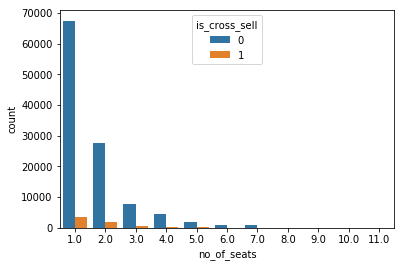

In [38]:
sns.countplot(x='no_of_seats', hue='is_cross_sell', data=train)
pd.crosstab(train.no_of_seats, train.is_cross_sell, normalize='index')

is_cross_sell,0,1
count_visited_city,,
3,0.943835,0.056165
4,0.943196,0.056804
5,0.939401,0.060599


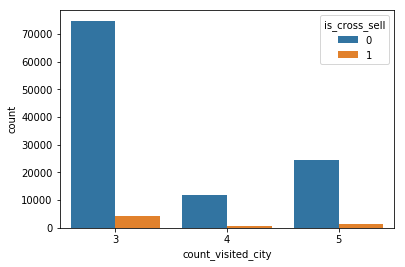

In [39]:
sns.countplot(x='count_visited_city', hue='is_cross_sell', data=train)
pd.crosstab(train.count_visited_city, train.is_cross_sell, normalize='index')

is_cross_sell,0,1
is_tx_promo_yes,,
0,0.962926,0.037074
1,0.915728,0.084272


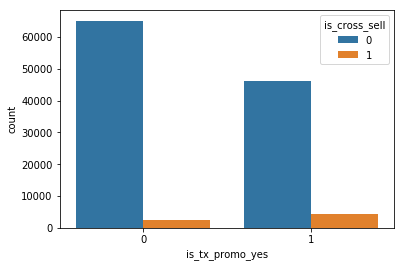

In [40]:
sns.countplot(x='is_tx_promo_yes', hue='is_cross_sell', data=train)
pd.crosstab(train.is_tx_promo_yes, train.is_cross_sell, normalize='index')

is_cross_sell,0,1
gender_m,,
0,0.939475,0.060525
1,0.945873,0.054127


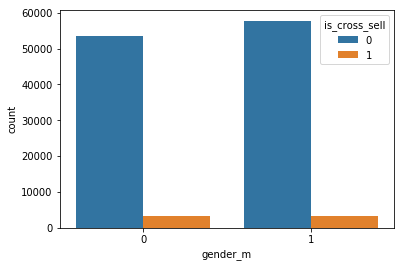

In [41]:
sns.countplot(x='gender_m', hue='is_cross_sell', data=train)
pd.crosstab(train.gender_m, train.is_cross_sell, normalize='index')

is_cross_sell,0,1
service_class_business,,
0,0.942787,0.057213
1,0.943060,0.056940


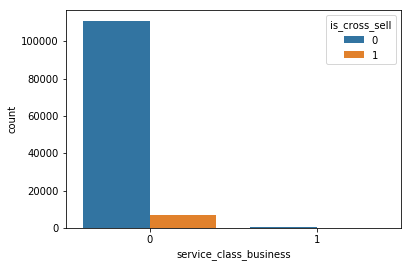

In [42]:
sns.countplot(x='service_class_business', hue='is_cross_sell', data=train)
pd.crosstab(train.service_class_business, train.is_cross_sell, normalize='index')

is_cross_sell,0,1
trip_round,,
0,0.912999,0.087001
1,0.944285,0.055715
2,0.995584,0.004416


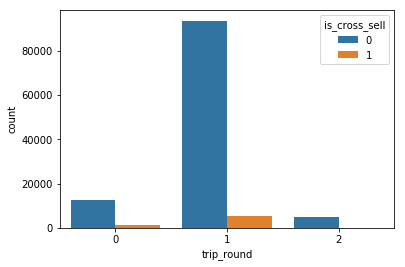

In [43]:
sns.countplot(x='trip_round', hue='is_cross_sell', data=train)
pd.crosstab(train.trip_round, train.is_cross_sell, normalize='index')

is_cross_sell,0,1
visited_city_id,,
0,0.942136,0.057864
1,0.939562,0.060438
2,0.943953,0.056047
3,0.951811,0.048189
4,0.937832,0.062168
5,0.933630,0.066370
6,0.949739,0.050261
7,0.941811,0.058189


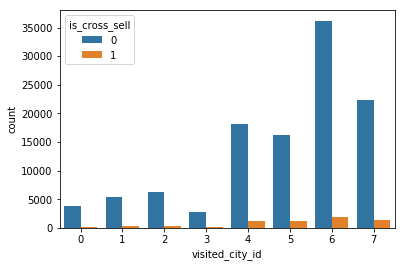

In [44]:
sns.countplot(x='visited_city_id', hue='is_cross_sell', data=train)
pd.crosstab(train.visited_city_id, train.is_cross_sell, normalize='index')

is_cross_sell,0,1
airlines_name_id,,
0,1.000000,0.000000
1,0.937535,0.062465
2,0.953623,0.046377
3,0.940604,0.059396
4,0.925231,0.074769
5,0.945772,0.054228
6,1.000000,0.000000
7,0.940940,0.059060


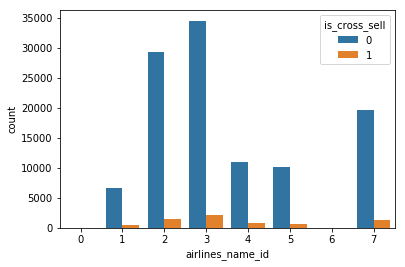

In [45]:
sns.countplot(x='airlines_name_id', hue='is_cross_sell', data=train)
pd.crosstab(train.airlines_name_id, train.is_cross_sell, normalize='index')

In [46]:
pd.crosstab(train.account_id_int, train.is_cross_sell, normalize='index')

is_cross_sell,0,1
account_id_int,,
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
79610,1.0,0.0
79611,1.0,0.0
79612,1.0,0.0


## B. Visualisasi Fitur Kuantitatif terhadap Cross Selling

Fitur kuantitatif yang akan divisualisasi adalah `member_duration_days`, `price`, dan `count_transaction`. Cara yang digunakan untuk visualisasi adalah dengan boxplot.

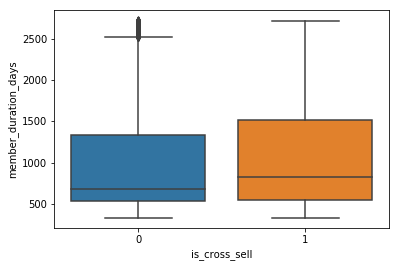

In [47]:
sns.boxplot(x='is_cross_sell', y='member_duration_days', data=train)

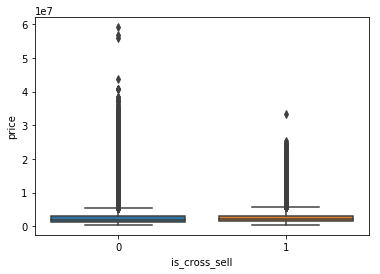

In [48]:
sns.boxplot(x='is_cross_sell', y='price', data=train)

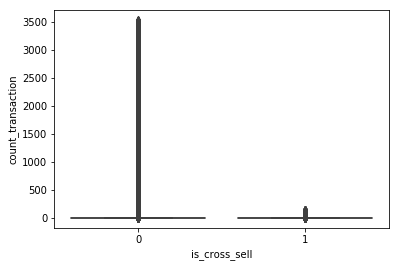

In [49]:
sns.boxplot(x='is_cross_sell', y='count_transaction', data=train)

# 4. Feature Engineering

![Feature engineering implementation](https://drive.google.com/uc?id=1VPGI6t3IAZTbH7tmg7R59fc5EYLHZZ8e)

Image 2. Feature engineering flow

*Target encoding* is one of the *categorical encoding* methods based on mapping independent attributes with high individual cardinality values (such as id, e-mail, etc.) to estimate the probability or expected value of a dependent dependent on certain statistical measurements.[2]

The encoding target is performed on the `account_id_int` feature. This is based on the hypothesis taken from the theory of "repeat-buying"[3] that users who do cross selling with higher frequencies, will have a higher probability also to do cross selling again. So that it can be made a feature of probability of cross selling events for certain users from their appearance on previous transactions. This is also supported by the results of visualization in the *Exploratory Data Analysis* section where the majority of accounts get cross selling for all orders or do not get cross selling at all.

We created a new feature called `account_id_enc` which is the result of the encoding target for each account based on the **mean** of all cross selling values for the respective account.

### Target encoding by mean value

In [50]:
mean = train['is_cross_sell'].mean()
mean_encode = train.groupby('account_id_int')['is_cross_sell'].mean()
train['account_id_enc'] = train['account_id_int'].map(mean_encode).fillna(mean)
test['account_id_enc'] = test['account_id_int'].map(mean_encode).fillna(mean)

## B. Feature selection

Feature selection was first performed on features that are * imbalance * and highly correlated with other features, such as `city`,` service_class`, `trip`, etc.

Periodic feature elimination is done after the validation stage by looking at * feature importance * and the accuracy of the validation results.

### Features Correlation

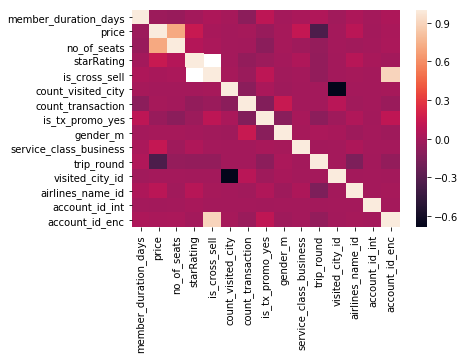

In [51]:
sns.heatmap(train.corr())

### Features Elimination

In [52]:
X = train.drop(['account_id', 'gender', 'trip', 'service_class', 
                'is_tx_promo', 'airlines_name', 'service_class_business',
                'hotel_id', 'visited_city', 'log_transaction', 'starRating', 'city', 'free_wifi',
                'pool_access', 'free_breakfast', 'count_visited_city', 'account_id_int'], axis=1)

In [53]:
test_ss = test.drop(['account_id', 'gender', 'trip', 'service_class',
                     'is_tx_promo', 'airlines_name', 'service_class_business',
                     'visited_city', 'log_transaction', 'count_visited_city', 'account_id_int'], axis=1)

## C. Feature Target

In [54]:
X.columns

Index(['member_duration_days', 'price', 'no_of_seats', 'is_cross_sell',
       'count_transaction', 'is_tx_promo_yes', 'gender_m', 'trip_round',
       'visited_city_id', 'airlines_name_id', 'account_id_enc'],
      dtype='object')

In [55]:
y = X['is_cross_sell']
X = X.drop(['is_cross_sell'],axis=1)

# 5. Modelling

## A. State-of-the-art: Stacking Classifier

*Stacking* method is one of the *ensemble learning* methods which is related to combining the results of classification using different learning algorithms in a dataset.[4] Method based on *Bayesian learning* theory which stipulates that to maximize prediction accuracy, rather than using only a single learning model, ideally using all models in a hypothetical space.[5]

Voting is one of the methods commonly used to combine the results of classifications of *base-classifier*. In the first phase, some *base-classifier* will be drained on the data. In the second phase, the final prediction is determined by *meta-classifier* of the majority of predictions among *base-classifier* in the first phase.

## B. Model estimators

The choice of methods and models *base-classifier* and *meta-classifier* is based on the advantages of *ensemble learning* in increasing prediction accuracy (Stacking), reducing variance (Bagging), and reducing bias (Boosting). [6] Bagging and Boosting methods are implemented on the use of *base-classifier* and the Stacking method is used as an improvised final prediction.

By using the stacking method, several *base-classifier* tunning results are used in making the first phase prediction, namely:

- `Random Forest Classifier:` the model combines several decision trees with Bagging techniques. In addition to the application of bagging, Random Forest can also assess the * feature importance * of the prediction process, so that this problem is chosen.

- `Extra Trees Classifier:` the model combines several decision trees. Each tree is formed from a subset of randomized features (Extremely Randomized Trees).

- `AdaBoost Classifier:` the model combines the classifier with the training data selection at each iteration and gives weight to the final prediction of the model.

- `Bagging Classifier:` implementation of Bagging techniques with certain base estimators. Build several models from randomly collected data subsets and combine them.



Then the `Voting Classifier` is used in the second phase as a *meta-classifier* determining the final prediction. Voting Classifier uses the wisdom of crowd system, we believe that some machine learning that is used as a voting system will have a better value than using only one machine learning model.

![Method implementation](https://drive.google.com/uc?id=1NMl41NFYoF6hePEDQ86l-h7b-kcES_q_)

Image 3. Stacking diagram

## C. Hyperparameter Tunning

Hyperparameter tunning is done empirically so that hyperparameter is obtained which can optimize the score.


### Base-classifier

In [56]:
# Hasil parameter tunning masing-masing base-classifier

rf = RandomForestClassifier(n_estimators=64, criterion= 'gini', max_depth=20, max_features=7, random_state= 1234,
                            class_weight= 'balanced', min_samples_split=2)

et = ExtraTreesClassifier(n_estimators=16, criterion= 'gini', max_depth=24, max_features= 6, random_state= 1234, 
                          class_weight= 'balanced', min_samples_split=2)

bc = BaggingClassifier(n_estimators=128, max_features=6, random_state=1234, bootstrap=False)

ab = AdaBoostClassifier(rf, n_estimators=10, random_state= 1234, learning_rate=0.005)

### Meta-classifier

In [57]:
vc = VotingClassifier(estimators=[('et', et), ('rf', rf), ('bc', bc), ('ab', ab)], voting='soft')

# 6. Validation





![validation flow](https://drive.google.com/uc?id=1yVe1wWpP_BKrYDM8rfkp2lXLjxw7eSEL)

Image 4. Validation process flow

## A. Validation score

The validation metric score that is the reference is F1-score. The score is used to compare whether a capital and its prediction results are good enough or not.

F1-score measures the balance between precision and recall, in which the considerations are False Negative and False Positive. Can be used to be metric when there is imbalance in the data.

![F1-score formula](https://www.mikulskibartosz.name/assets/images/2019-02-04-f1-score-explained/formula.png)

Image 5. F1-score formula

In addition to the F1-score metric, accuracy remains the next reference to measure how accurately the model correctly predicted the data.

In [58]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

## B. Train/Test Splitting

Train / Split Test is used to validate overfitting and underfitting of predictions. There are 20% of the data that become Hold out data. The model will only train 80% of the data, so Hold out data can be used as model validation.

![Train/Test split diagram](https://drive.google.com/uc?id=10s102L6TmmAKuGdEVJ2pEwXCxVnJ5iIj)

Image 6. Train/Test split diagram

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234, stratify = y)

## C. Cross Validation
Cross-validation technique is used in validating prediction results.

![cross-validation](https://drive.google.com/uc?id=12lYGhLigD3GTGLK6IVtsTYkma1_s9FKM)

Image 7. 5-Fold Validation


In [60]:
kfold = KFold(n_splits=5, random_state=1234, shuffle = True)

### Random Forest Classifier Validation

In [61]:
# Skor prediksi Random Forest Classifier

results_rf = cross_validate(estimator=rf,X=X_train,
                                          y=y_train,
                                          cv=kfold,
                                          scoring=scoring)
results_rf

{'fit_time': array([4.4375968 , 4.51612282, 4.49598098, 4.5956924 , 4.63338327]),
 'score_time': array([0.3217423 , 0.31987476, 0.32317233, 0.32706022, 0.32193375]),
 'test_accuracy': array([0.98208987, 0.98389063, 0.98298977, 0.98442054, 0.98330772]),
 'test_precision': array([0.84142114, 0.85123239, 0.83187391, 0.82464029, 0.83333333]),
 'test_recall': array([0.86234458, 0.87749546, 0.88044486, 0.90255906, 0.88372093]),
 'test_f1_score': array([0.85175439, 0.86416443, 0.85547051, 0.86184211, 0.85778781])}

In [62]:
# Validasi hold out test

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_f1_score = f1_score(y_pred, y_test)
rf_acc = accuracy_score(y_pred, y_test)

print("Hold out prediction score: ", rf_f1_score)
print("Accuracy score: ", rf_acc)

Hold out prediction score:  0.8472022955523674
Accuracy score:  0.9819415006358626


### Extra Trees Classifier Validation

In [63]:
# Skor prediksi Extra Trees Classifier

results_et = cross_validate(estimator=et,X=X_train,
                                          y=y_train,
                                          cv=kfold,
                                          scoring=scoring)
results_et

{'fit_time': array([0.8540616 , 0.89506483, 0.89949369, 0.89091945, 0.88133478]),
 'score_time': array([0.1333375 , 0.13399839, 0.13405228, 0.12918496, 0.13046288]),
 'test_accuracy': array([0.98272573, 0.9828308 , 0.98298977, 0.9846325 , 0.98367866]),
 'test_precision': array([0.88240918, 0.87047619, 0.85822306, 0.85658153, 0.86213409]),
 'test_recall': array([0.81971581, 0.82940109, 0.84151993, 0.85826772, 0.84930233]),
 'test_f1_score': array([0.84990792, 0.84944238, 0.84978942, 0.8574238 , 0.8556701 ])}

In [64]:
# Validasi hold out test

et.fit(X_train, y_train)
y_pred = et.predict(X_test)
et_f1_score = f1_score(y_pred, y_test)
et_acc = accuracy_score(y_pred, y_test)

print("Hold out prediction score: ", et_f1_score)
print("Accuracy score: ", et_acc)

Hold out prediction score:  0.8455526609601788
Accuracy score:  0.9824077999152183


### Bagging Classifier Validation

In [65]:
# Skor prediksi Bagging Classifier

results_bc = cross_validate(estimator=bc,X=X_train,
                                          y=y_train,
                                          cv=kfold,
                                          scoring=scoring)
results_bc

{'fit_time': array([27.37386131, 27.43007088, 27.41525006, 27.89654517, 27.38278937]),
 'score_time': array([1.56296492, 1.55312181, 1.54492426, 1.56501865, 1.53937483]),
 'test_accuracy': array([0.98256677, 0.98224789, 0.98362567, 0.98563934, 0.9840496 ]),
 'test_precision': array([0.9617613 , 0.96149218, 0.94976636, 0.94933655, 0.95853081]),
 'test_recall': array([0.73712256, 0.72504537, 0.75347544, 0.7746063 , 0.75255814]),
 'test_f1_score': array([0.83459025, 0.82669426, 0.84031008, 0.85311653, 0.84314747])}

In [66]:
# Validasi hold out test

bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
bc_f1_score = f1_score(y_pred, y_test)
bc_acc = accuracy_score(y_pred, y_test)

print("Hold out prediction score: ", bc_f1_score)
print("Accuracy score: ", bc_acc)

Hold out prediction score:  0.8349193214729004
Accuracy score:  0.9830860534124629


### AdaBoost Classifier Validation

In [67]:
# Skor prediksi AdaBoost Classifier

results_ab = cross_validate(estimator=ab,X=X_train,
                                          y=y_train,
                                          cv=kfold,
                                          scoring=scoring)
results_ab

{'fit_time': array([45.75343418, 44.35293436, 45.31847072, 45.40731287, 46.26581836]),
 'score_time': array([2.90112972, 2.95705771, 2.94807601, 2.90227842, 2.88288045]),
 'test_accuracy': array([0.9819309 , 0.9840496 , 0.9834137 , 0.98410259, 0.98351969]),
 'test_precision': array([0.83865401, 0.84917175, 0.83537653, 0.81625442, 0.83391608]),
 'test_recall': array([0.86323268, 0.88384755, 0.88415199, 0.90944882, 0.88744186]),
 'test_f1_score': array([0.85076586, 0.86616274, 0.85907249, 0.8603352 , 0.85984678])}

In [68]:
# Validasi hold out test

ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
ab_f1_score = f1_score(y_pred, y_test)
ab_acc = accuracy_score(y_pred, y_test)

print("Hold out prediction score: ", ab_f1_score)
print("Accuracy score: ", ab_acc)

Hold out prediction score:  0.8491978609625669
Accuracy score:  0.982068673166596


### Voting Classifier Validation

In [69]:
# Skor prediksi Voting Classifier

results_vc = cross_validate(estimator=vc,X=X_train,
                                          y=y_train,
                                          cv=kfold,
                                          scoring=scoring)
results_vc

{'fit_time': array([77.48641086, 76.2998507 , 77.05645609, 77.62315273, 77.25500441]),
 'score_time': array([4.86016154, 4.86172056, 5.03963828, 4.87646675, 4.7763896 ]),
 'test_accuracy': array([0.98341458, 0.9846855 , 0.98314875, 0.98532139, 0.98415558]),
 'test_precision': array([0.87813953, 0.884579  , 0.85660731, 0.85769603, 0.8619403 ]),
 'test_recall': array([0.8383659 , 0.84845735, 0.84708063, 0.87204724, 0.85953488]),
 'test_f1_score': array([0.85779191, 0.86614173, 0.85181733, 0.8648121 , 0.86073591])}

In [70]:
# Validasi hold out test

vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
vc_f1_score = f1_score(y_pred, y_test)
vc_acc = accuracy_score(y_pred, y_test)

print("Hold out prediction score: ", vc_f1_score)
print("Accuracy score: ", vc_acc)

Hold out prediction score:  0.8482605477424131
Accuracy score:  0.9826197541331072


### Test score plot

In [71]:
est = ['Random Forest Classifier', 'Extra Trees Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'Voting Classifier']
acc = [rf_acc, et_acc, bc_acc, ab_acc, vc_acc]
f1 = [rf_f1_score, et_f1_score, bc_f1_score, ab_f1_score, vc_f1_score]

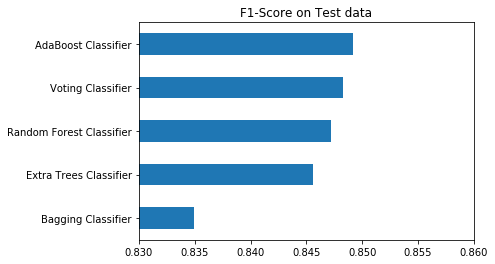

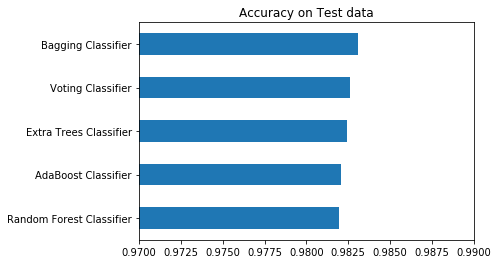

In [72]:
(pd.Series(f1, index=est).sort_values(ascending= True)
   .plot(kind='barh'))
plt.xlim(0.83,0.86)
plt.title('F1-Score on Test data')
plt.show()

(pd.Series(acc, index=est).sort_values(ascending= True)
   .plot(kind='barh'))
plt.xlim(0.97,0.99)
plt.title('Accuracy on Test data')
plt.show()

## D. Feature Impotance

Text(0.5, 1.0, 'Feature importances')

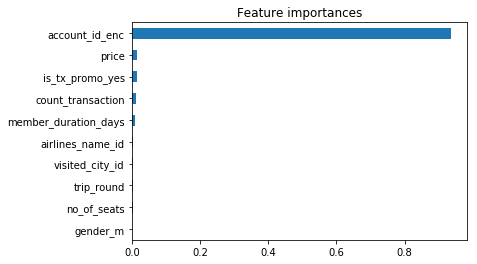

In [73]:
rf.fit(X,y)

(pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending= True)
   .plot(kind='barh'))
plt.title('Feature importances')

# 7. Conclusion and Recommendation 

## A. Conclusion

Preprocessing data is done to understand the data and transform it to be ready for processing by machine learning. Exploratory data analysis is needed to determine the relationship between each feature and the target feature, namely cross selling. From this process, insight was taken that there was a lot of imbalance in the data.

Then, based on the theory of "repeat-buying" we hypothesize account_id is one of the most influential features on cross selling. This is also supported by the results of exploratory data analysis. Therefore, the encoder target engineering features are applied to the account. In addition, features that are not used can be discarded.

The hypothesis of "repeat-buying" is proven to have a big effect on predictions, where the account_id_enc feature has a feature of importance far higher than the other features. The implementation of `account_id_enc` can increase the predicted score on the Kaggle private leaderboard from 79,428 to 83,228. The stacking classifier technique applied to get predictions is also proven to be able to produce higher F1-scores and Accuracy cross validation compared to single classifiers, but the differences are not so large.

The final result obtained is 0.83288 for the F1-score metric on the Kaggle private leaderboard.

## B. Recommendation 

From the work that has been done, we realize that our work is far from perfect, there are a few suggestions to make the next work better:

- From the company data that has been provided, we can make profiling people with the help of an unsupervised machine learning or Recommendation system, in order to provide hotel recommendations that are appropriate to that person's profile.
- If this data has a date for each transaction, we can use machine learning models such as Long Short Term Memory to view purchase transactions.
- Creating new features such as from the number of member days to the number of years a member can do, using the number of transactions and making an average number of transaction

# 8. References 

[1] Wirth, R. & Hipp, J.(2000). CRISP-DM: Towards a standard process model for data mining. *Proceedings of the Fourth International Conference on the Practical Applicationof Knowledge Discovery and Data Mining*; April 11-13, 2000; Manchester, UK p. 29-39.

[2] Micci-Barreca, D. (2001). A preprocessing scheme for high-cardinality categorical attributes in classification and prediction problems. *SIGKDD Explorations*, 3, 27–32.

[3] Rahul Bhagat, Srevatsan Muralidharan, Alex Lobzhanidze, and Shankar Vishwanath. (2018). Buy It Again: Modeling Repeat Purchase Recommendations. *Proceedings of the 24th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining*. ACM, 62–70

[4] Dzeroski, S. & Zenko, B. (2004). Is Combining Classifiers with Stacking better than Selecting the Best One?. *Machine Learning*, 54, 255-273.

[5] Ali, K. M. & Pazzani, M. J. (1996). Error reduction through learning multiple descriptions. *Machine Learning*, 4, 173-202.

[6] Bauer, E., & Kohavi, R. (1999). An empirical comparison of voting classification algorithms: Bagging, boosting, and variants. *Machine Learning*, 36, 105–142.
